# Malware Analysis using Machine learning and Data Mining

# Static Analysis using android permission dataset

The dataset consists of android apks and the permission used by them through api calls. Based on the dataset, we were able to implmenet a Machine Learning based binary classifier to deduce whether a given apk is benign based on the permission used by it. 

In [1]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

from sklearn import preprocessing
import torch
from sklearn import svm
from sklearn import tree
import pandas as pd
#from sklearn.externals import joblib
import pickle
import numpy as np
import seaborn as sns

In [2]:
import pandas as pd
df = pd.read_csv("../input/datasetandroidpermissions/train.csv", sep=";")

In [3]:
df = df.astype("int64")
df.type.value_counts()

1    199
0    199
Name: type, dtype: int64

In [4]:
pd.Series.sort_values(df[df.type==1].sum(axis=0), ascending=False)[1:11]

android.permission.INTERNET                  195
android.permission.READ_PHONE_STATE          190
android.permission.ACCESS_NETWORK_STATE      167
android.permission.WRITE_EXTERNAL_STORAGE    136
android.permission.ACCESS_WIFI_STATE         135
android.permission.READ_SMS                  124
android.permission.WRITE_SMS                 104
android.permission.RECEIVE_BOOT_COMPLETED    102
android.permission.ACCESS_COARSE_LOCATION     80
android.permission.CHANGE_WIFI_STATE          75
dtype: int64

In [5]:
pd.Series.sort_values(df[df.type==0].sum(axis=0), ascending=False)[:10]

android.permission.INTERNET                  104
android.permission.WRITE_EXTERNAL_STORAGE     76
android.permission.ACCESS_NETWORK_STATE       62
android.permission.WAKE_LOCK                  36
android.permission.RECEIVE_BOOT_COMPLETED     30
android.permission.ACCESS_WIFI_STATE          29
android.permission.READ_PHONE_STATE           24
android.permission.VIBRATE                    21
android.permission.ACCESS_FINE_LOCATION       18
android.permission.READ_EXTERNAL_STORAGE      15
dtype: int64

<AxesSubplot:>

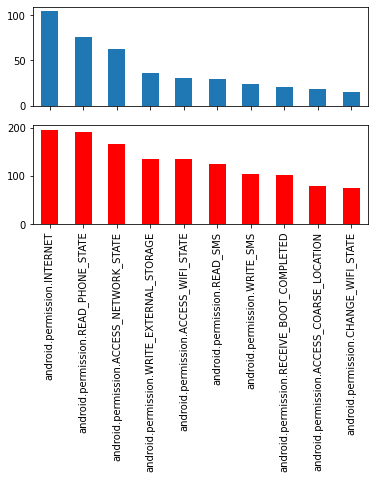

In [6]:
import matplotlib.pyplot as plt
fig, axs =  plt.subplots(nrows=2, sharex=True)

pd.Series.sort_values(df[df.type==0].sum(axis=0), ascending=False)[:10].plot.bar(ax=axs[0])
pd.Series.sort_values(df[df.type==1].sum(axis=0), ascending=False)[1:11].plot.bar(ax=axs[1], color="red")

In [7]:
df.head()

,android,android.app.cts.permission.TEST_GRANTED,android.intent.category.MASTER_CLEAR.permission.C2D_MESSAGE,android.os.cts.permission.TEST_GRANTED,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_ALL_EXTERNAL_STORAGE,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_COARSE_LOCATION,...,com.android.voicemail.permission.WRITE_VOICEMAIL,com.foo.mypermission,com.foo.mypermission2,org.chromium.chrome.shell.permission.C2D_MESSAGE,org.chromium.chrome.shell.permission.DEBUG,org.chromium.chrome.shell.permission.SANDBOX,org.chromium.chromecast.shell.permission.SANDBOX,org.chromium.content_shell.permission.SANDBOX,test_permission,type
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:330], df['type'], test_size=0.20, random_state=42)

### Classification using Naive Bayes Algorithm

In [9]:
# Naive Bayes algorithm
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# pred
pred = gnb.predict(X_test)

# accuracy
accuracy = accuracy_score(pred, y_test)
print("naive_bayes")
print(accuracy)
print(classification_report(pred, y_test, labels=None))

naive_bayes
0.8375
              precision    recall  f1-score   support

           0       0.91      0.76      0.83        41
           1       0.78      0.92      0.85        39

    accuracy                           0.84        80
   macro avg       0.85      0.84      0.84        80
weighted avg       0.85      0.84      0.84        80



### Classification using K Neighbours Algorithm

In [10]:
# kneighbors algorithm

for i in range(3,15,3):
    
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    pred = neigh.predict(X_test)
    # accuracy
    accuracy = accuracy_score(pred, y_test)
    print("kneighbors {}".format(i))
    print(accuracy)
    print(classification_report(pred, y_test, labels=None))
    print("")

kneighbors 3
0.8875
              precision    recall  f1-score   support

           0       0.94      0.82      0.88        39
           1       0.85      0.95      0.90        41

    accuracy                           0.89        80
   macro avg       0.89      0.89      0.89        80
weighted avg       0.89      0.89      0.89        80


kneighbors 6
0.85
              precision    recall  f1-score   support

           0       0.94      0.76      0.84        42
           1       0.78      0.95      0.86        38

    accuracy                           0.85        80
   macro avg       0.86      0.85      0.85        80
weighted avg       0.87      0.85      0.85        80


kneighbors 9
0.8625
              precision    recall  f1-score   support

           0       0.94      0.78      0.85        41
           1       0.80      0.95      0.87        39

    accuracy                           0.86        80
   macro avg       0.87      0.86      0.86        80
weighted avg  

### Classification using Decision Tree Classifier

In [11]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Read the csv test file

pred = clf.predict(X_test)
# accuracy
accuracy = accuracy_score(pred, y_test)
print(clf)
print(accuracy)
print(classification_report(pred, y_test, labels=None))

DecisionTreeClassifier()
0.9375
              precision    recall  f1-score   support

           0       0.94      0.91      0.93        35
           1       0.93      0.96      0.95        45

    accuracy                           0.94        80
   macro avg       0.94      0.93      0.94        80
weighted avg       0.94      0.94      0.94        80



# Classification using Dynamic Analysis based on network activity

The Dataset consists of apks and their network activities using dynamic analysis. Some of the network activities stored in apks are TCP Packets sent, UDP Packets sent, Ports acccesed using TCP and UDP, and their DNS query times. 

In [12]:
import pandas as pd
data = pd.read_csv("../input/network-traffic-android-malware/android_traffic.csv", sep=";")
data.head()

,name,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,tcp_urg_packet,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,duracion,avg_local_pkt_rate,avg_remote_pkt_rate,source_app_packets.1,dns_query_times,type
0,AntiVirus,36,6,3,3911,0,0,39,33,5100,4140,NaN,NaN,NaN,39,3,benign
1,AntiVirus,117,0,9,23514,0,0,128,107,26248,24358,NaN,NaN,NaN,128,11,benign
2,AntiVirus,196,0,6,24151,0,0,205,214,163887,24867,NaN,NaN,NaN,205,9,benign
3,AntiVirus,6,0,1,889,0,0,7,6,819,975,NaN,NaN,NaN,7,1,benign
4,AntiVirus,6,0,1,882,0,0,7,6,819,968,NaN,NaN,NaN,7,1,benign


In [13]:
data.columns

Index(['name', 'tcp_packets', 'dist_port_tcp', 'external_ips', 'vulume_bytes',
       'udp_packets', 'tcp_urg_packet', 'source_app_packets',
       'remote_app_packets', 'source_app_bytes', 'remote_app_bytes',
       'duracion', 'avg_local_pkt_rate', 'avg_remote_pkt_rate',
       'source_app_packets.1', 'dns_query_times', 'type'],
      dtype='object')

In [14]:
data.isna().sum()

name                       0
tcp_packets                0
dist_port_tcp              0
external_ips               0
vulume_bytes               0
udp_packets                0
tcp_urg_packet             0
source_app_packets         0
remote_app_packets         0
source_app_bytes           0
remote_app_bytes           0
duracion                7845
avg_local_pkt_rate      7845
avg_remote_pkt_rate     7845
source_app_packets.1       0
dns_query_times            0
type                       0
dtype: int64

In [15]:
data = data.drop(['duracion','avg_local_pkt_rate','avg_remote_pkt_rate'], axis=1).copy()

In [16]:
data.describe()

,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,tcp_urg_packet,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,source_app_packets.1,dns_query_times
count,7845.000000,7845.000000,7845.000000,7.845000e+03,7845.000000,7845.000000,7845.000000,7845.000000,7.845000e+03,7.845000e+03,7845.000000,7845.000000
mean,147.578713,7.738177,2.748502,1.654375e+04,0.056724,0.000255,152.911918,194.706310,2.024967e+05,1.692260e+04,152.911918,4.898917
std,777.920084,51.654222,2.923005,8.225650e+04,1.394046,0.015966,779.034618,1068.112696,1.401076e+06,8.238182e+04,779.034618,18.900478
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000e+00,6.900000e+01,1.000000,0.000000
25%,6.000000,0.000000,1.000000,8.880000e+02,0.000000,0.000000,7.000000,7.000000,9.340000e+02,1.046000e+03,7.000000,1.000000
50%,25.000000,0.000000,2.000000,3.509000e+03,0.000000,0.000000,30.000000,24.000000,4.090000e+03,3.803000e+03,30.000000,3.000000
75%,93.000000,0.000000,4.000000,1.218900e+04,0.000000,0.000000,98.000000,92.000000,2.624400e+04,1.261000e+04,98.000000,5.000000
max,37143.000000,2167.000000,43.000000,4.226790e+06,65.000000,1.000000,37150.000000,45928.000000,6.823516e+07,4.227323e+06,37150.000000,913.000000


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='tcp_urg_packet'>

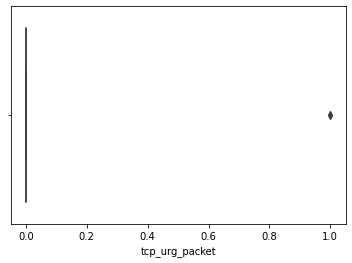

In [17]:
sns.boxplot(data.tcp_urg_packet)

In [18]:
data.loc[data.tcp_urg_packet > 0].shape[0]

2

In [19]:
data = data.drop(columns=["tcp_urg_packet"], axis=1).copy()
data.shape

(7845, 13)

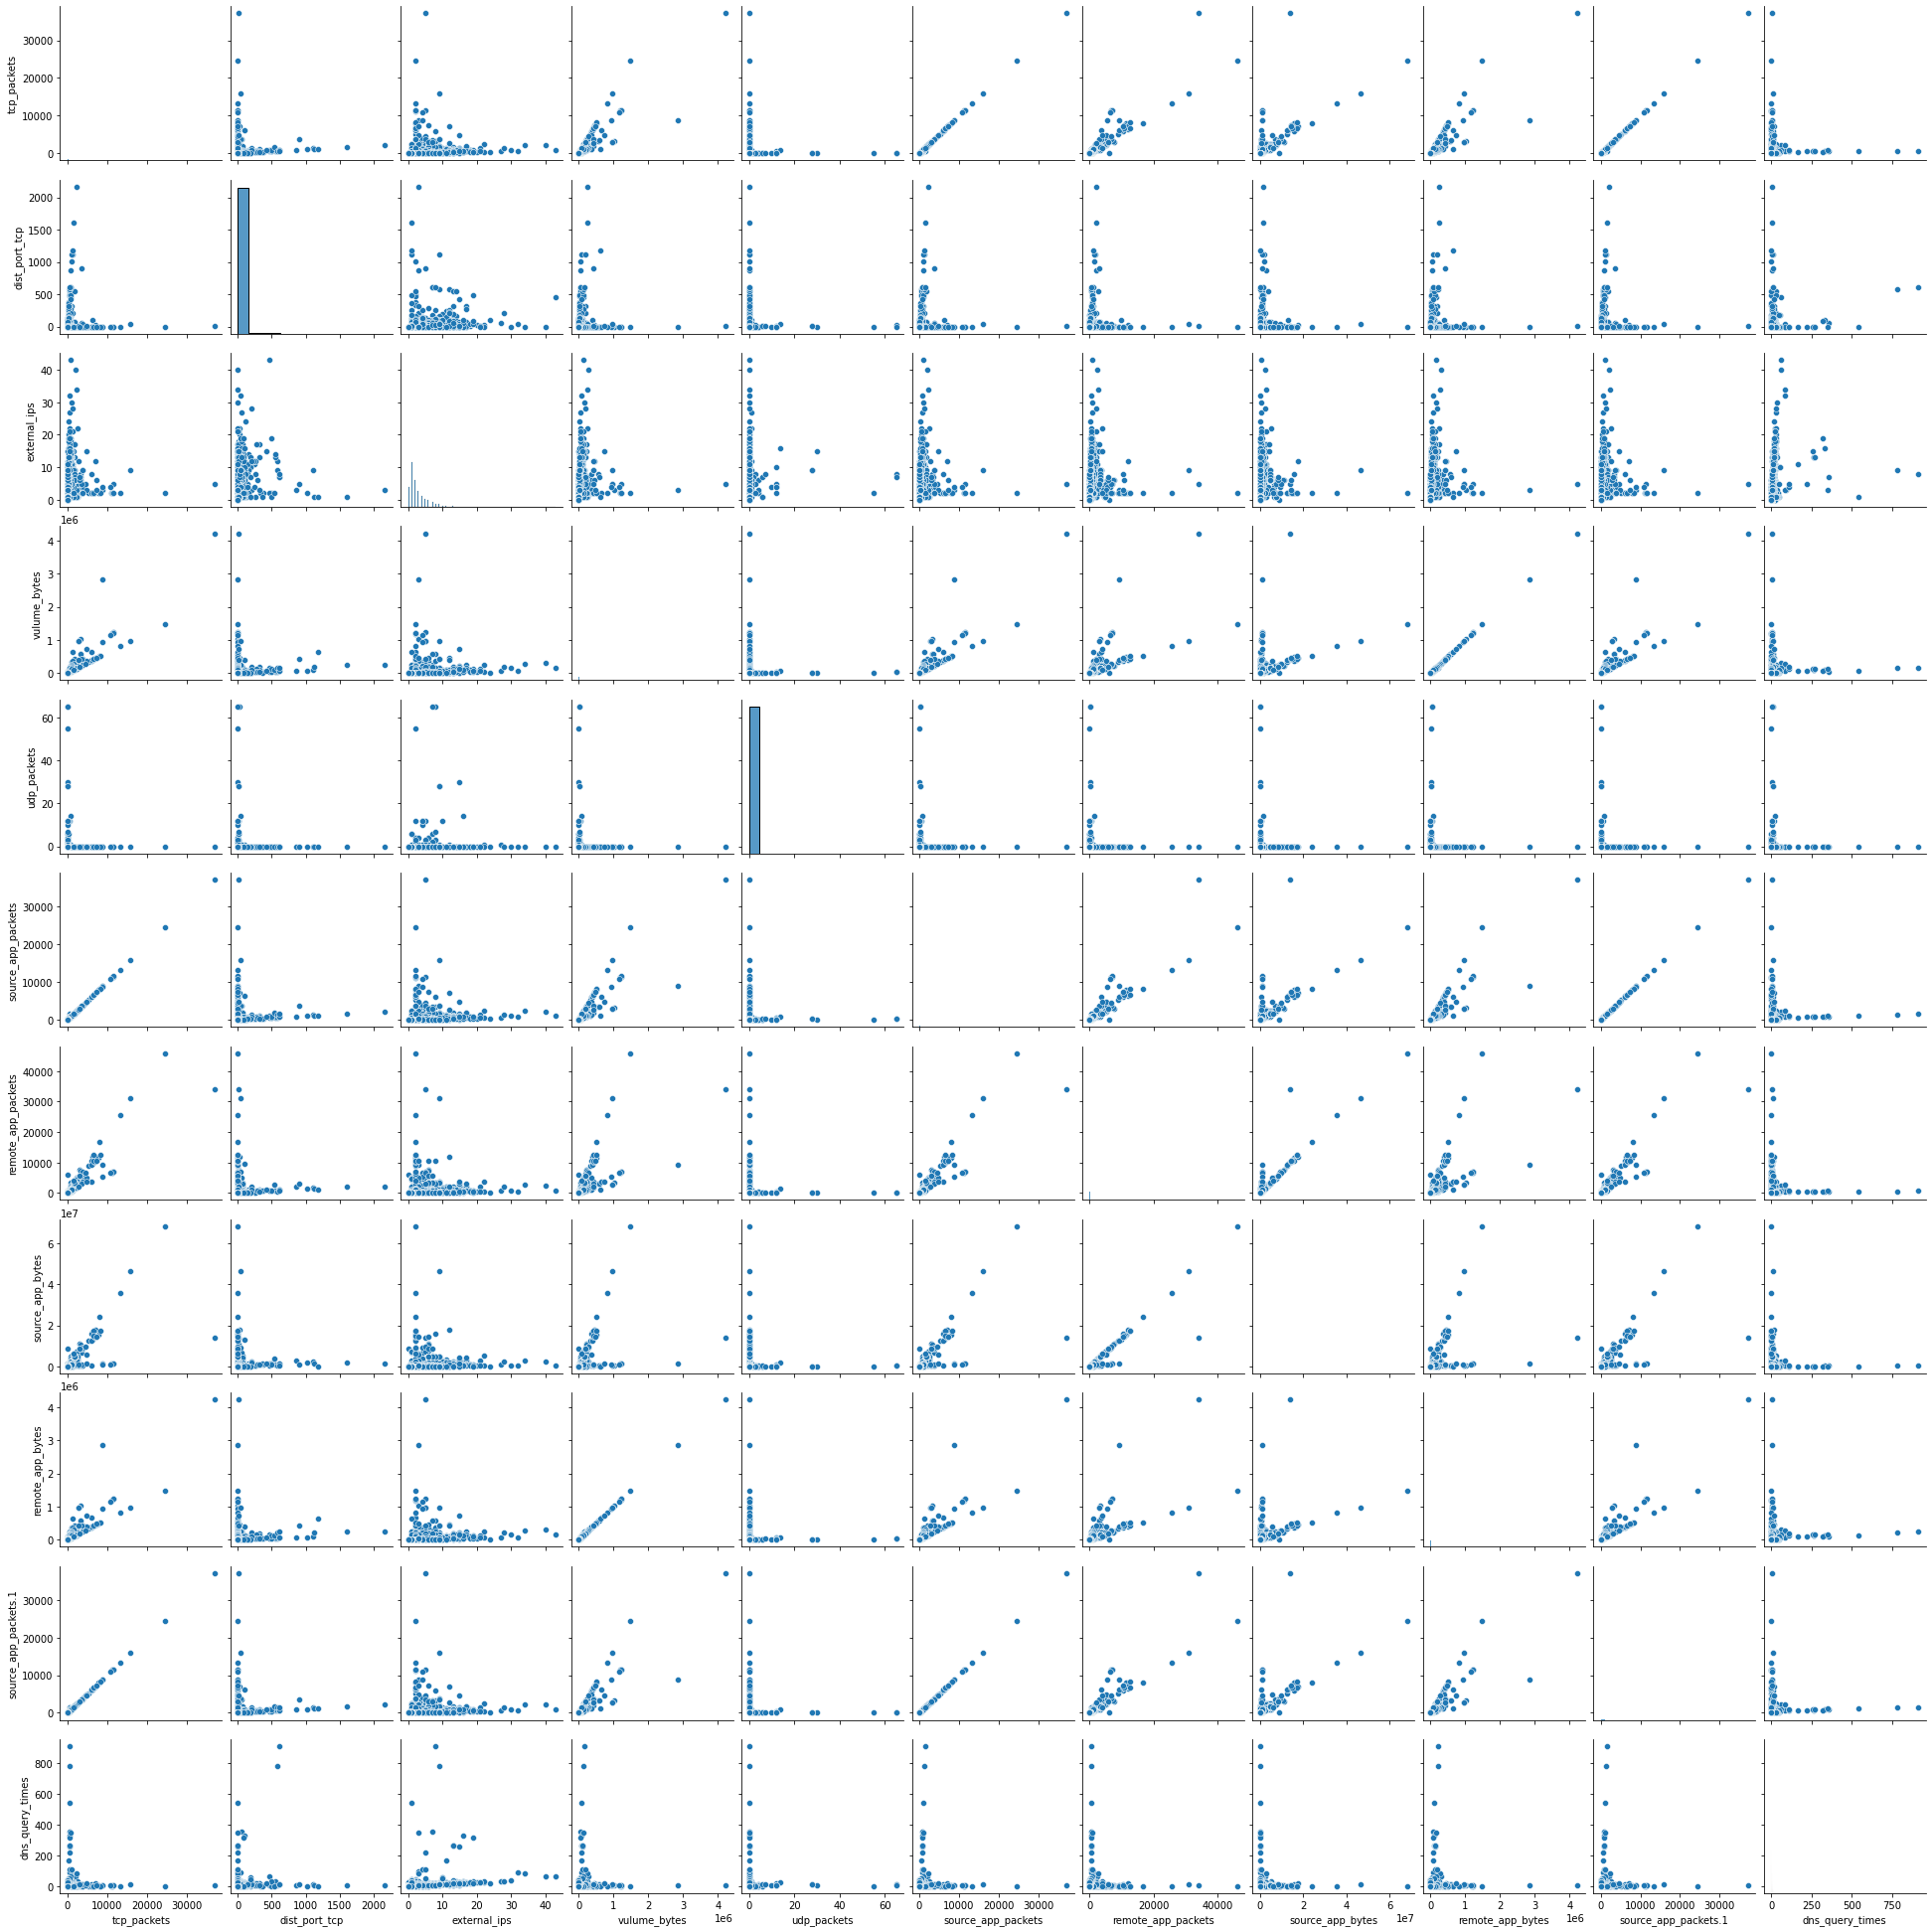

In [20]:
sns.pairplot(data)

In [21]:
data=data[data.tcp_packets<20000].copy()
data=data[data.dist_port_tcp<1400].copy()
data=data[data.external_ips<35].copy()
data=data[data.vulume_bytes<2000000].copy()
data=data[data.udp_packets<40].copy()
data=data[data.remote_app_packets<15000].copy()

In [22]:
data[data.duplicated()].sum()

name                    AntiVirusAntiVirusAntiVirusAntiVirusAntiVirusA...
tcp_packets                                                         15038
dist_port_tcp                                                        3514
external_ips                                                         1434
vulume_bytes                                                      2061210
udp_packets                                                            38
source_app_packets                                                  21720
remote_app_packets                                                  18841
source_app_bytes                                                  8615120
remote_app_bytes                                                  2456160
source_app_packets.1                                                21720
dns_query_times                                                      5095
type                    benignbenignbenignbenignbenignbenignbenignbeni...
dtype: object

In [23]:
data=data.drop('source_app_packets.1',axis=1).copy()

In [24]:
data.columns

Index(['name', 'tcp_packets', 'dist_port_tcp', 'external_ips', 'vulume_bytes',
       'udp_packets', 'source_app_packets', 'remote_app_packets',
       'source_app_bytes', 'remote_app_bytes', 'dns_query_times', 'type'],
      dtype='object')

In [25]:
data.type.astype("str")

0          benign
1          benign
2          benign
3          benign
4          benign
          ...    
7840    malicious
7841    malicious
7842    malicious
7843    malicious
7844    malicious
Name: type, Length: 7832, dtype: object

In [26]:
type(data)

pandas.core.frame.DataFrame

In [27]:
data.iloc[:,1:11]

,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,dns_query_times
0,36,6,3,3911,0,39,33,5100,4140,3
1,117,0,9,23514,0,128,107,26248,24358,11
2,196,0,6,24151,0,205,214,163887,24867,9
3,6,0,1,889,0,7,6,819,975,1
4,6,0,1,882,0,7,6,819,968,1
...,...,...,...,...,...,...,...,...,...,...
7840,0,0,0,0,0,2,2,257,143,2
7841,4,4,1,296,0,5,1,86,382,1
7842,0,0,0,0,0,2,2,257,143,2
7843,0,0,0,0,0,2,2,257,143,2


In [28]:
scaler = preprocessing.RobustScaler()
scaledData = scaler.fit_transform(data.iloc[:,1:11])
scaledData = pd.DataFrame(scaledData, columns=['tcp_packets','dist_port_tcp','external_ips','vulume_bytes','udp_packets','source_app_packets','remote_app_packets',' source_app_bytes','remote_app_bytes','dns_query_times'])

## ML Model 

In [43]:
X_train, X_test, y_train, y_test = train_test_split(scaledData.iloc[:,0:10], data.type.astype("str"), test_size=0.2, random_state=100)

In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import confusion_matrix  
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report

In [45]:
print('--------Applying GaussianNB Classifier ----------')
gnb = GaussianNB()
gnb_fit = gnb.fit(X_train, y_train)  
gnb_prediction = gnb.predict(X_test) 


print('--------Applying KNeighborsClassifier Classifier ----------')
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)

print('--------Applying RandomForestClassifier Classifier ----------')
RF = RandomForestClassifier(max_depth=10, random_state=100)  
RF.fit(X_train, y_train)
RF_prediction = RF.predict(X_test)

print('--------Applying Support vector machine Classifier ----------')
SVM = LinearSVC(loss='hinge', dual=True)
SVM.fit(X_train,y_train)
SVM_prediction = SVM.predict(X_test)

--------Applying GaussianNB Classifier ----------
--------Applying KNeighborsClassifier Classifier ----------
--------Applying RandomForestClassifier Classifier ----------
--------Applying Support vector machine Classifier ----------


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [54]:
print('-------Performance Evaluation----------')
#precision_score, recall_score, f1_score, accuracy_score
results = []
selector = 'LR'
results.append((selector,'','', '',''))
results.append(('Classifier','Accurary','Precision', 'Recall','F1-Score'))
results.append(('KNN ', accuracy_score(y_test, KNN_prediction)*100,
                precision_score(y_test, KNN_prediction)*100,
                recall_score(y_test, KNN_prediction)*100,
                f1_score(y_test, KNN_prediction)*100))
results.append(('RF ', accuracy_score(y_test,  RF_prediction)*100,
                precision_score(y_test,  RF_prediction)*100,
                recall_score(y_test,  RF_prediction)*100,
                f1_score(y_test,  RF_prediction)*100))
results.append(('NB ', accuracy_score(y_test,  gnb_prediction)*100,
                precision_score(y_test,  gnb_prediction)*100,
                recall_score(y_test,  gnb_prediction)*100,
                f1_score(y_test,  gnb_prediction)*100))
results.append(('SVM ', accuracy_score(y_test,  SVM_prediction)*100,
                precision_score(y_test,  SVM_prediction)*100,
                recall_score(y_test,  SVM_prediction)*100,
                f1_score(y_test,  SVM_prediction)*100))


print('type(results): ', type(results))
print('results: ', results)
df_results = pd.DataFrame(results)
print('type(df_results): ', type(df_results))
print('df_results: ', df_results)

-------Performance Evaluation----------


ValueError: pos_label=1 is not a valid label. It should be one of ['benign', 'malicious']

In [33]:
print('Confusion Matrix gnb_prediction')
print(confusion_matrix(y_test,gnb_prediction))
print('Confusion Matrix KNN_prediction')
print(confusion_matrix(y_test,KNN_prediction))
print('Confusion Matrix RF_prediction')
print(confusion_matrix(y_test,RF_prediction))
print('Confusion Matrix SVM_prediction')
print(confusion_matrix(y_test,SVM_prediction))

Confusion Matrix gnb_prediction
[[103 840]
 [ 30 594]]
Confusion Matrix KNN_prediction
[[847  96]
 [ 94 530]]
Confusion Matrix RF_prediction
[[881  62]
 [163 461]]
Confusion Matrix SVM_prediction
[[914  29]
 [575  49]]


In [34]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


SVM Model Accuracy: 0.614550


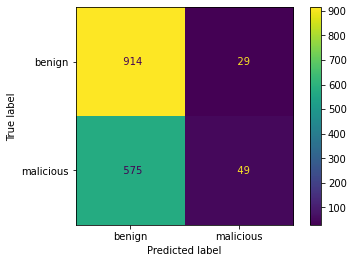

In [35]:
confusionmatrix = plot_confusion_matrix(SVM, X_test, y_test, values_format='5d')
print("SVM Model Accuracy: %f" % SVM.score(X_test, y_test))  
plt.show()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Naive Bayes Model Accuracy: 0.444799


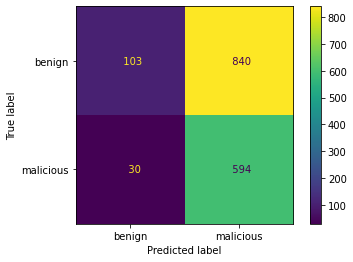

In [36]:
confusionmatrix = plot_confusion_matrix(gnb, X_test, y_test, values_format='5d')
print("Naive Bayes Model Accuracy: %f" % gnb.score(X_test, y_test))  
plt.show()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


 Random Forest Model Accuracy: 0.856414


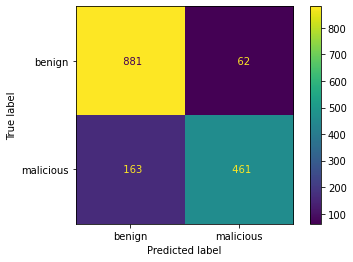

In [37]:
confusionmatrix = plot_confusion_matrix(RF, X_test, y_test, values_format='5d')
print(" Random Forest Model Accuracy: %f" % RF.score(X_test, y_test))  
plt.show()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


KKN Model Accuracy: 0.878749


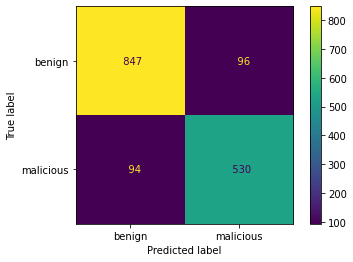

In [38]:
confusionmatrix = plot_confusion_matrix(KNN_model, X_test, y_test, values_format='5d')
print("KKN Model Accuracy: %f" % KNN_model.score(X_test, y_test))  
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


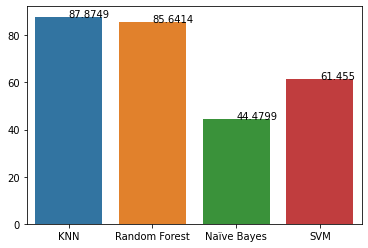

In [41]:
Myscore1 = {'KNN' : 87.8749,'Random Forest': 85.6414, 'Naïve Bayes': 44.4799, 'SVM' : 61.455}
score1= list(Myscore1.values())
model = list(Myscore1.keys())
sns.barplot(model,score1) 
for index, value in enumerate(score1): 
    plt.text(index,value,str(value)) 
    
plt.show() 

In [39]:
from tabulate import tabulate
Myscore3 = [['KNN', KNN_model.score(X_test, y_test)*100],
            ['Random Forest', RF.score(X_test, y_test)*100], 
            ['Naïve Bayes', gnb.score(X_test, y_test)*100], 
            ['SVM' , SVM.score(X_test, y_test)*100]]

  
#define header names
col_names = ["Model", "Accuracy"]
  
#display table
print(tabulate(Myscore3, headers=col_names))

Model            Accuracy
-------------  ----------
KNN               87.8749
Random Forest     85.6414
Naïve Bayes       44.4799
SVM               61.455


In [40]:
print('df_results: ', df_results)

NameError: name 'df_results' is not defined

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


SVM Model
0.9829079307201458
              precision    recall  f1-score   support

           0       0.87      0.40      0.55       226
           1       0.98      1.00      0.99      8550

    accuracy                           0.98      8776
   macro avg       0.92      0.70      0.77      8776
weighted avg       0.98      0.98      0.98      8776

cohen kappa score
0.5379548147607361
SVM Model Accuracy: 0.982908


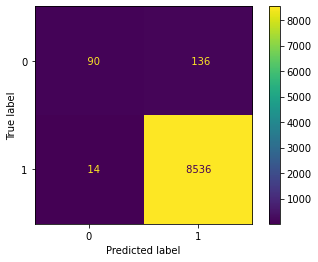

In [72]:
SVM = LinearSVC(loss='hinge', dual=True)
SVM.fit(X_train,y_train)
pred = SVM.predict(X_test)
## accuracy
accuracy = accuracy_score(y_test,pred)
print("SVM Model")
print(accuracy)
print(classification_report(y_test,pred, labels=None))
print("cohen kappa score")
print(cohen_kappa_score(y_test, pred))
confusionmatrix = plot_confusion_matrix(SVM, X_test, y_test, values_format='5d')
print("SVM Model Accuracy: %f" % SVM.score(X_test, y_test))  
plt.show()

naive_bayes
0.8893573381950775
              precision    recall  f1-score   support

           0       0.11      0.46      0.18       226
           1       0.98      0.90      0.94      8550

    accuracy                           0.89      8776
   macro avg       0.55      0.68      0.56      8776
weighted avg       0.96      0.89      0.92      8776

cohen kappa score
0.13919935350270218
naive_bayes Model Accuracy: 0.889357


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


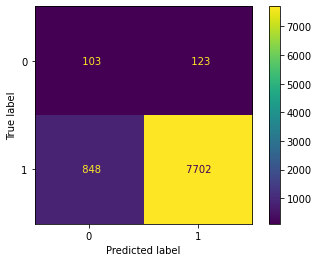

In [73]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)
## accuracy
accuracy = accuracy_score(y_test,pred)
print("naive_bayes")
print(accuracy)
print(classification_report(y_test,pred, labels=None))
print("cohen kappa score")
print(cohen_kappa_score(y_test, pred))
confusionmatrix = plot_confusion_matrix(gnb, X_test, y_test, values_format='5d')
print("naive_bayes Model Accuracy: %f" % gnb.score(X_test, y_test))  
plt.show()

kneighbors 3
0.9843892433910666
              precision    recall  f1-score   support

           0       0.45      0.89      0.60       113
           1       1.00      0.99      0.99      8663

    accuracy                           0.98      8776
   macro avg       0.72      0.94      0.79      8776
weighted avg       0.99      0.98      0.99      8776

cohen kappa score
0.5888108979927414



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


KNN Model Accuracy: 0.984389


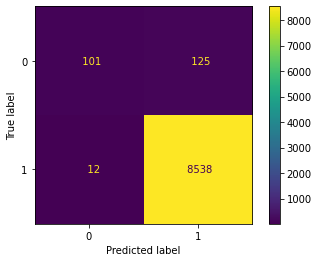

kneighbors 6
0.9847310847766636
              precision    recall  f1-score   support

           0       0.44      0.93      0.60       108
           1       1.00      0.99      0.99      8668

    accuracy                           0.98      8776
   macro avg       0.72      0.96      0.80      8776
weighted avg       0.99      0.98      0.99      8776

cohen kappa score
0.5920076825721073



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


KNN Model Accuracy: 0.984731


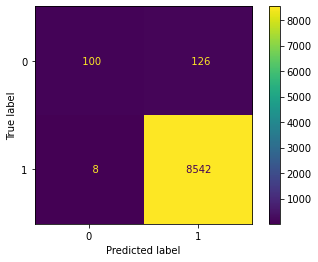

kneighbors 9
0.9846171376481313
              precision    recall  f1-score   support

           0       0.44      0.93      0.59       107
           1       1.00      0.99      0.99      8669

    accuracy                           0.98      8776
   macro avg       0.72      0.96      0.79      8776
weighted avg       0.99      0.98      0.99      8776

cohen kappa score
0.5877724906090512



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


KNN Model Accuracy: 0.984617


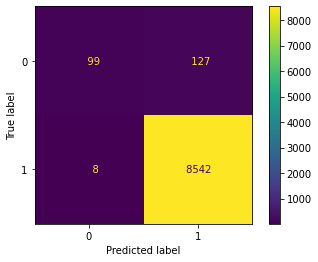

kneighbors 12
0.9841613491340018
              precision    recall  f1-score   support

           0       0.42      0.93      0.57       101
           1       1.00      0.98      0.99      8675

    accuracy                           0.98      8776
   macro avg       0.71      0.96      0.78      8776
weighted avg       0.99      0.98      0.99      8776

cohen kappa score
0.568052122800184



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


KNN Model Accuracy: 0.984161


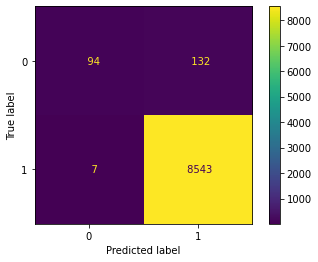

In [75]:
# kneighbors algorithm

for i in range(3,15,3):
    
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    pred = neigh.predict(X_test)
    # accuracy
    accuracy = accuracy_score(pred, y_test)
    print("kneighbors {}".format(i))
    print(accuracy)
    print(classification_report(pred, y_test, labels=None))
    print("cohen kappa score")
    print(cohen_kappa_score(y_test, pred))
    print("")
    confusionmatrix = plot_confusion_matrix(neigh, X_test, y_test, values_format='5d')
    print("KNN Model Accuracy: %f" % neigh.score(X_test, y_test))  
    plt.show()

RandomForestClassifier(max_depth=50, n_estimators=250, random_state=45)
0.9892889699179581
              precision    recall  f1-score   support

           0       0.96      0.61      0.74       226
           1       0.99      1.00      0.99      8550

    accuracy                           0.99      8776
   macro avg       0.98      0.80      0.87      8776
weighted avg       0.99      0.99      0.99      8776

cohen kappa score
0.7393858059559283
[[ 137   89]
 [   5 8545]]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Random Forest Model Accuracy: 0.989289


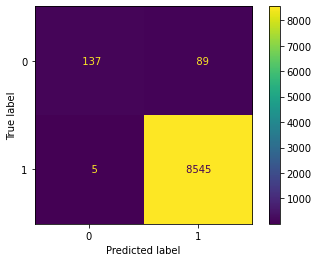

In [76]:
rdF=RandomForestClassifier(n_estimators=250, max_depth=50,random_state=45)
rdF.fit(X_train,y_train)
pred=rdF.predict(X_test)
cm=confusion_matrix(y_test, pred)

accuracy = accuracy_score(y_test,pred)
print(rdF)
print(accuracy)
print(classification_report(y_test,pred, labels=None))
print("cohen kappa score")
print(cohen_kappa_score(y_test, pred))
print(cm)
confusionmatrix = plot_confusion_matrix(rdF, X_test, y_test, values_format='5d')
print("Random Forest Model Accuracy: %f" % rdF.score(X_test, y_test))  
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


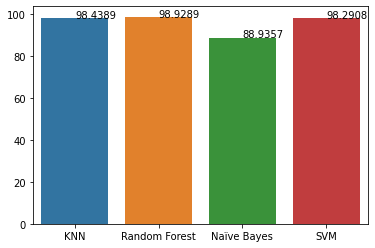

In [77]:
Myscore1 = {'KNN' : 98.4389,'Random Forest': 98.9289, 'Naïve Bayes': 88.9357, 'SVM' : 98.2908}
score1= list(Myscore1.values())
model = list(Myscore1.keys())
sns.barplot(model,score1) 
for index, value in enumerate(score1): 
    plt.text(index,value,str(value)) 
    
plt.show() 

# Dynamic Analysis using API Call Sequence in a CUCKOO sandbox reports

* The CUCKOO sanbox reports consists of almost 100 APIs which were accessed by android application during an enclosed environment testing where they were executed and their api requests were monitored.
* Here each column represents an API and each row consists of an apk represented by a unique hash value. Here the count of apis called is stored on each data cell.
* Here, classifier column is named malware, where 1 represents the apk as malware whereas 0 represents goodware. 
* refernce - "Oliveira, Angelo; Sassi, Renato José (2019): Behavioral Malware Detection Using Deep Graph Convolutional Neural Networks. TechRxiv. Preprint." at https://doi.org/10.36227/techrxiv.10043099.v1

In [61]:
import pandas as pd
data = pd.read_csv("../input/malware-analysis-datasets-api-call-sequences/dynamic_api_call_sequence_per_malware_100_0_306.csv")
data.head()

,hash,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,...,t_91,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99,malware
0,071e8c3f8922e186e57548cd4c703a5d,112,274,158,215,274,158,215,298,76,...,71,297,135,171,215,35,208,56,71,1
1,33f8e6d08a6aae939f25a8e0d63dd523,82,208,187,208,172,117,172,117,172,...,81,240,117,71,297,135,171,215,35,1
2,b68abd064e975e1c6d5f25e748663076,16,110,240,117,240,117,240,117,240,...,65,112,123,65,112,123,65,113,112,1
3,72049be7bd30ea61297ea624ae198067,82,208,187,208,172,117,172,117,172,...,208,302,208,302,187,208,302,228,302,1
4,c9b3700a77facf29172f32df6bc77f48,82,240,117,240,117,240,117,240,117,...,209,260,40,209,260,141,260,141,260,1


Malware analysis can be done using above data by performing data analysis of above dataset. Here we can determine that there would be a pattern on api calls made by malicious software compared to regular software. Thus, we can use binary classifier algorithms to justify a malware analysis. 

In [62]:
type(data)

pandas.core.frame.DataFrame

In [63]:
data.columns

Index(['hash', 't_0', 't_1', 't_2', 't_3', 't_4', 't_5', 't_6', 't_7', 't_8',
       ...
       't_91', 't_92', 't_93', 't_94', 't_95', 't_96', 't_97', 't_98', 't_99',
       'malware'],
      dtype='object', length=102)

In [64]:
data.isna().sum()

hash       0
t_0        0
t_1        0
t_2        0
t_3        0
          ..
t_96       0
t_97       0
t_98       0
t_99       0
malware    0
Length: 102, dtype: int64

In [65]:
data.dtypes.astype("str")

hash       object
t_0         int64
t_1         int64
t_2         int64
t_3         int64
            ...  
t_96        int64
t_97        int64
t_98        int64
t_99        int64
malware     int64
Length: 102, dtype: object

In [66]:
data.head()

,hash,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,...,t_91,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99,malware
0,071e8c3f8922e186e57548cd4c703a5d,112,274,158,215,274,158,215,298,76,...,71,297,135,171,215,35,208,56,71,1
1,33f8e6d08a6aae939f25a8e0d63dd523,82,208,187,208,172,117,172,117,172,...,81,240,117,71,297,135,171,215,35,1
2,b68abd064e975e1c6d5f25e748663076,16,110,240,117,240,117,240,117,240,...,65,112,123,65,112,123,65,113,112,1
3,72049be7bd30ea61297ea624ae198067,82,208,187,208,172,117,172,117,172,...,208,302,208,302,187,208,302,228,302,1
4,c9b3700a77facf29172f32df6bc77f48,82,240,117,240,117,240,117,240,117,...,209,260,40,209,260,141,260,141,260,1


## Binary Classification model using machine learning algorithms

In [67]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:101], data['malware'], test_size=0.20, random_state=42)

### Gaussian Naive Bayes Model

* The algorithms uses fundamental Gaussian Probability concepts to generate model which uses conditional probability for classification. 

* Precision refers to the number of true positives divided by the total number of positive predictions, it indicates the quality of a positive prediction made by the model.

* The recall is calculated as the ratio between the number of Positive samples correctly classified as Positive to the total number of Positive samples. The recall measures the model's ability to detect Positive samples

*  F1 score is defined as the harmonic mean between precision and recall. It is used as a statistical measure to rate performance. It can be used to compare performace of classifiers.

* The support is the number of samples of the true response that lie in that class.


In [68]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# pred
pred = gnb.predict(X_test)

# accuracy
accuracy = accuracy_score(pred, y_test)
print("naive_bayes")
print(accuracy)
print(classification_report(pred, y_test, labels=None))

naive_bayes
0.8893573381950775
              precision    recall  f1-score   support

           0       0.46      0.11      0.18       951
           1       0.90      0.98      0.94      7825

    accuracy                           0.89      8776
   macro avg       0.68      0.55      0.56      8776
weighted avg       0.85      0.89      0.86      8776



* The macro-averaged F1 score (or macro F1 score) is computed using the arithmetic mean (aka unweighted mean) of all the per-class F1 scores.

* Whereas weighted considers support of each class in calculation of average. 

* 0 represents class of goodware, whereas 1 represents class of malware. 

### K Neighbours Algorithm 

* The algorithm treats each column as independent attributes of each data, with which the algorithm tries to find another data with similar attributes. 

* Tuning value of k, represents the nature of algorithm ie the number of neighbours to be taken into considoration during classification.

In [69]:
# kneighbors algorithm

for i in range(3,15,3):
    
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    pred = neigh.predict(X_test)
    # accuracy
    accuracy = accuracy_score(pred, y_test)
    print("kneighbors {}".format(i))
    print(accuracy)
    print(classification_report(pred, y_test, labels=None))
    print("")

kneighbors 3
0.9843892433910666
              precision    recall  f1-score   support

           0       0.45      0.89      0.60       113
           1       1.00      0.99      0.99      8663

    accuracy                           0.98      8776
   macro avg       0.72      0.94      0.79      8776
weighted avg       0.99      0.98      0.99      8776


kneighbors 6
0.9847310847766636
              precision    recall  f1-score   support

           0       0.44      0.93      0.60       108
           1       1.00      0.99      0.99      8668

    accuracy                           0.98      8776
   macro avg       0.72      0.96      0.80      8776
weighted avg       0.99      0.98      0.99      8776


kneighbors 9
0.9846171376481313
              precision    recall  f1-score   support

           0       0.44      0.93      0.59       107
           1       1.00      0.99      0.99      8669

    accuracy                           0.98      8776
   macro avg       0.72      0

### Decision Tree Algorithm

* The algorithm constructs a tree based splitting data such that the attributes completely classify the data. The tree is then used to classify data based on classifer present in dataset, 

In [ ]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Read the csv test file

pred = clf.predict(X_test)
# accuracy
accuracy = accuracy_score(pred, y_test)
print(clf)
print(accuracy)
print(classification_report(pred, y_test, labels=None))

### Result of Machine learning models for dataset - 3

#### Naive Bayes Algorithm

##### * Macro AVG - 0.56
##### * Weighted AVG - 0.86

#### K Nearest Neighbours Algorithm 

##### * Macro AVG - 0.80 (4 neighbours)
##### * Weighted AVG - 0.99

#### Decision Tree Algorithm 

##### * Macro AVG - 0.84
##### * Weighted AVG - 0.98

##### Considering a binary classification, the weights of each class can be ignored, thus K Nearest Neighbours algorithm has efficient f-score among other algorithms for above scenario. 